# Chapter 4 練習と総合問題解答

In [1]:
# 以下のモジュールを使うので、あらかじめ読み込んでおいてください
import numpy as np
import numpy.random as random
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame

# 可視化モジュール
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 小数第３まで表示
%precision 3

'%.3f'

## 4.1 確率・統計の基礎



### <a name ="pos3-2">4.1.1 確率

#### <練習問題 1>

コインの表裏をそれぞれ0と1に対応させるデータを作成してください。また、コイン投げの試行を1000回した時の、表裏のそれぞれの出る確率を実装してください。

In [27]:
# 解答
# コインと見なしたデータ
# 注意：配列は順番が考慮されているので、厳密には集合ではないが、集合とみなす
# 0:head , 1:tail
coin_data = np.array([0,1])

# コインを1000回投げます
calc_steps = 1000

# seedの固定
random.seed(0)

# choiceを使う
count_all_coin = random.choice(coin_data,calc_steps)

In [25]:
# それぞれの数字がどれくらいの割合で抽出されたか計算
for i in [0,1]:
    print(i,"が出る確率",len(count_all_coin[count_all_coin==i]) / calc_steps)

0 が出る確率 0.496
1 が出る確率 0.504


#### <練習問題 2>

くじ引きの問題を考えます。1000本のくじの中に、100本のあたりがあるとします。AくんとBくんが順にくじを引き、Aくん、Bくんが共にあたりを引く確率を求めてください。ただし、引いたくじは戻さないとします。（これは手計算でも大丈夫です。）

(解答)  
X:Aくんがあたりを引く事象  
Y:Bくんがあたりを引く事象  
とします。  

すると、以下のように計算できます。
  
\begin{eqnarray}
P(X \cap Y) = P(Y|X)P(X) =\frac{9}{999}*\frac{100}{1000} = \frac{1}{1110}
\end{eqnarray}

#### <練習問題 3>
日本国内である病気（X）になっている人の割合は、0.1%だとします。Xを発見する検査方法で、次のことがわかっています。

・その病気の人がその検査を受けると99%の人が陽性反応（病気である）を示します。

・その病気でない人がその検査を受けると3%の人が陽性反応を示します。（誤診）

日本に住んでいるある人がこの検査を受けたら陽性反応を示しました。この人が病気Xである確率は何%でしょうか？

(解答)  
各事象を次のように表します。  
A:病気（X）である  
B:陽性反応を示す    
とします。すると以下のことがわかります。

$P(B|A)$:病気の人が陽性反応を示す  
$P(A)$:病気の人の割合  
$P(B|A^c)$:病気Xでない人が陽性を示す  
$P(A^c)$:病気でない人の割合  

そして、ベイズの定理を利用すると、求めたい確率は以下のように計算できます。
  
\begin{eqnarray}
 P(A|B) =\frac{P(B|A)*P(A)}{P(B)} = \frac{P(B|A)*P(A)}{P(B|A)P(A) + P(B|A^c)P(A^c)}=0.032
\end{eqnarray}

### <a name ="pos3-3">4.1.2 確率変数と確率分布の基礎

#### <練習問題 1>

平均0、分散1の正規母集団からn=100の標本抽出を1000回繰り返して、標本平均の経験的な標本分布(ヒストグラム)を描いてください。

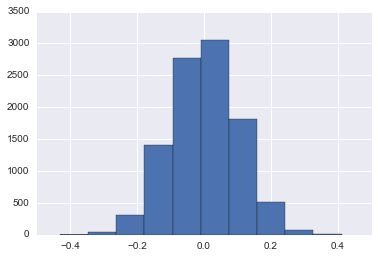

In [87]:
# 解答
import numpy as np
import scipy as sp

N = 10000
# normal version
normal_sample_data = [np.random.normal(0, 1, 100).mean() for _ in range(N)]

plt.hist(normal_sample_data)
plt.grid(True)

#### <練習問題 2>

上記と同じく、対数正規分布の場合を実装してください。

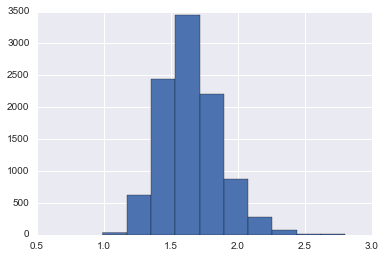

In [88]:
# 解答
import numpy as np
import scipy as sp

N = 10000
# normal version
normal_sample_data = [np.random.lognormal(0, 1, 100).mean() for _ in range(N)]

plt.hist(normal_sample_data)
plt.grid(True)

#### <練習問題 3>

学生のデータの数学一期目の成績G1のヒストグラムとカーネル密度推定を描いてください。

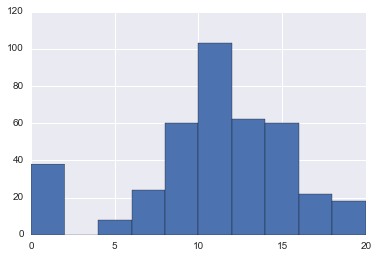

In [100]:
# 解答
plt.hist(student_data_math.G1)
plt.grid(True)

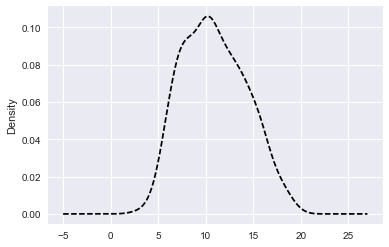

In [13]:
# 解答
student_data_math.G1.plot(kind='kde',style='k--')
plt.grid(True)

### 4.1.4 標本分布

#### <練習問題 1>

自由度5、25、50のカイ二乗分布からの乱数をそれぞれ1000個発生させて、ヒストグラムを書いてください。

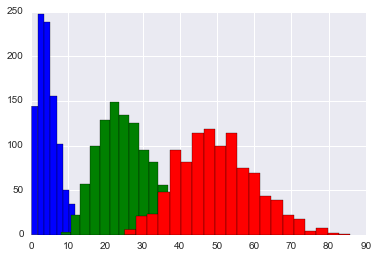

In [127]:
from numpy import random

for df, c in zip([5,25,50], "bgr"):
    x = random.chisquare(df, 1000)
    plt.hist(x, 20, color=c)

#### <練習問題 2>

自由度100のt分布からの乱数を1000個発生させて、ヒストグラムを書いてください。

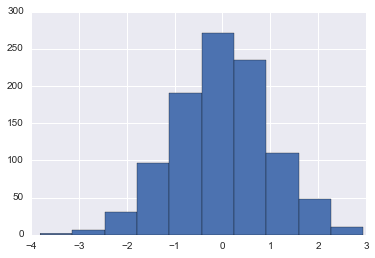

In [129]:
# t-分布
x = random.standard_t(100, 1000)
plt.hist(x)
plt.grid(True)

#### <練習問題 3>

自由度(10,30)、(20,25)のF分布からの乱数をそれぞれ1000個発生させて、ヒストグラムを書いてください。

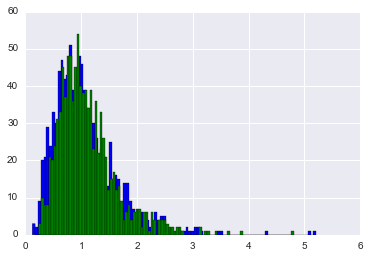

In [135]:
# F 分布
for df, c in zip([ (10,30), (20,25)], "bg"):
    x = random.f(df[0], df[1], 1000)
    plt.hist(x, 100, color=c)

### 4.1.5 統計的推定

#### <練習問題 1>
平均$\mu$で分散$\sigma^2$の正規母集団から大きさnの標本から作った標本平均は、母平均であることが望ましく、この不偏性を示してください。

(解答)  
標本平均
\begin{eqnarray}
\overline{X}=\frac{1}{n}\sum^n_{i=1}X_i
\end{eqnarray}
について、
\begin{eqnarray}
E[\overline{X}]=\mu
\end{eqnarray}
を示めせば、不偏性がいえます。

ここで、
\begin{eqnarray}
E[\overline{X}]=E[\frac{1}{n}\sum^n_{i=1}X_i]=\frac{1}{n}E[\sum^n_{i=1}X_i]
\end{eqnarray}

が成り立ち、問題文より
$E[\overline{X_i}]=\mu$が使えるので、
\begin{eqnarray}
E[\overline{X}]=\mu
\end{eqnarray}
となるので、不偏性がいえました。

#### <練習問題 2>
あるコインを5回投げたとして、裏、表、裏、表、表と出ました。このコインの表が出る確率を$\theta$として、これを推定してください。

(解答)  
コインの表が出る確率を$\theta$とすると、裏が出る確率は$1-\theta$となります。尤度関数は、
\begin{eqnarray}
L(\theta)=\theta^3(1-\theta)^2
\end{eqnarray}
となり、この関数を微分して、最大値を求めると$\theta$が0.6の時に最大になりますので、これが最尤推定値となります。なお、手計算でも可能ですし、以下のような図を書くと、おおよその値がわかります。

In [38]:
import matplotlib.pyplot as plt

# 尤度関数
def coin_likeh_fuc(x):
    return (x**3) * ((1-x)**2)

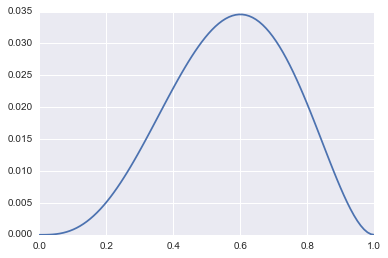

In [41]:
x = np.linspace(0, 1, 100)
plt.plot(x,coin_likeh_fuc(x))
plt.grid(True)

#### <練習問題 3>
母集団が以下の指数分布に従っている時に、そこから大きさnの標本${X_1,X_2,...X_n}$を得たとして、母数${\lambda}$を最尤推定してください。
\begin{eqnarray}
f(x|\lambda) = \lambda \mathrm{e}^{-\lambda x}
\end{eqnarray}

(解答)  
与えられた式において、両辺の対数を取って、対数尤度を考えると、
\begin{eqnarray}
n\log(\lambda)-(\lambda)\sum^n_{i=1}x_i
\end{eqnarray}
となりますので、これを$\lambda$について微分して、解くと、

\begin{eqnarray}
\frac{n}{\sum^n_{i=1}x_i}
\end{eqnarray}

が得られ、これが最尤推定量になります。

### 4.1.6 統計的検定

#### <練習問題 1>

上記と同じデータで、数学とポルトガル語の成績のG2のそれぞれの平均について、差があると言えるでしょうか。また、G3はどうでしょうか。

In [61]:
import pandas as pd

student_data_math = pd.read_csv("student-mat.csv",sep=";")
student_data_por = pd.read_csv("student-por.csv",sep=";")
student_data_merge = pd.merge(student_data_math
                              ,student_data_por
                              ,on=["school","sex","age","address","famsize","Pstatus","Medu"
                                   ,"Fedu","Mjob","Fjob","reason","nursery","internet"]
                              ,how='inner'
                              ,suffixes=('_math', '_por'))

In [62]:
# 解答
from scipy import stats

print("G2数学の成績平均：",student_data_merge.G2_math.mean())
print("G2ポルトガル語の成績平均：",student_data_merge.G2_por.mean())

t, p = stats.ttest_rel(student_data_merge.G2_math, student_data_merge.G2_por)
print( "p値 =",p )

G2数学の成績平均： 10.712041884816754
G2ポルトガル語の成績平均： 12.238219895287958
p値 = 4.06228248013e-19


In [63]:
print("G3数学の成績平均：",student_data_merge.G3_math.mean())
print("G3ポルトガル語の成績平均：",student_data_merge.G3_por.mean())

t, p = stats.ttest_rel(student_data_merge.G3_math, student_data_merge.G3_por)
print( "p値 = ",p )

G3数学の成績平均： 10.387434554973822
G3ポルトガル語の成績平均： 12.515706806282722
p値 = 5.56149211369e-21


どちらも有意差1%未満で差があると結論できました。

## 4.2 総合問題

### 4.2.1 推定と検定の問題
4.1.6 統計的検定で使用したデータ（student_data_merge）を使って、以下の問いに答えてください。

(1)それぞれの欠席数については、差があるといえるでしょうか。

(2)それぞれの勉強時間についてはどうでしょうか。

#### 解答 (1)
上記と同じデータで、それぞれの欠席数については、差があるといえるでしょうか。

In [66]:
# 解答
print("G2数学の欠席数平均：",student_data_merge.absences_math.mean())
print("G2ポルトガル語の欠席平均：",student_data_merge.absences_por.mean())

t, p = stats.ttest_rel(student_data_merge.absences_math, student_data_merge.absences_por)
print( "p値 = ",p )

G2数学の欠席数平均： 5.319371727748691
G2ポルトガル語の欠席平均： 3.6727748691099475
p値 = 2.34416568884e-06


有意差1%未満で差があると結論できました。

#### 解答 (2)

上記と同じデータで、それぞれの勉強時間についてはどうでしょうか。

In [69]:
# 解答
print("G2数学の勉強時間平均：",student_data_merge.studytime_math.mean())
print("G2ポルトガル語の勉強時間平均：",student_data_merge.studytime_por.mean())

t, p = stats.ttest_rel(student_data_merge.studytime_math, student_data_merge.studytime_por)
print( "p値 = ",p)

G2数学の勉強時間平均： 2.0340314136125652
G2ポルトガル語の勉強時間平均： 2.0392670157068062
p値 = 0.564384275698


有意差5%でも差があるとはいえないようです。